In [117]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


from wordcloud import WordCloud
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px

import plotly.graph_objects as go



In [118]:
df = pd.read_csv('Censorship_Patterns_Across_Decades.csv')
df.head()

# View the first few rows of the data
df.head()


,Decade,Title,Author,Year of Publication,Year of Ban,Country/Region of Ban,Reason for Ban,Plot Summary,Themes,Political/Social Context
0,1990,American Psycho,Bret Easton Ellis,1991,1991,"Australia, Germany","Violence, sexual content",A disturbing narrative following the life of P...,"Violence, Consumerism, Alienation","Set during the 1980s in New York, a time of ex..."
1,1990,The Giver,Lois Lowry,1993,1994,USA,"Political content, euthanasia",Set in a dystopian society where emotions and ...,"Control, Conformity, Freedom of Choice",Depicts a controlled society that can be seen ...
2,1990,Harry Potter and the Philosopher's Stone,J.K. Rowling,1997,2000,Multiple countries,Witchcraft,A young boy named Harry discovers he is a wiza...,"Good vs. Evil, Friendship, Identity","Written in the late 1990s, reflecting the cult..."
3,1990,The Perks of Being a Wallflower,Stephen Chbosky,1999,2005,USA,"Sexual content, drug use","A coming-of-age novel about Charlie, a shy and...","Mental Health, Trauma, Identity","Explores issues of mental health, trauma, and ..."
4,1990,The Bluest Eye,Toni Morrison,1970,1994,USA,"Sexual content, racism","The story of Pecola, an African American girl ...","Race, Beauty, Self-Worth","Set during the Great Depression, highlighting ..."


In [119]:

# Get basic info on data types and missing values
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Decade                    20 non-null     int64 
 1   Title                     20 non-null     object
 2   Author                    20 non-null     object
 3   Year of Publication       20 non-null     int64 
 4   Year of Ban               20 non-null     int64 
 5   Country/Region of Ban     20 non-null     object
 6   Reason for Ban            20 non-null     object
 7   Plot Summary              20 non-null     object
 8   Themes                    20 non-null     object
 9   Political/Social Context  20 non-null     object
dtypes: int64(3), object(7)
memory usage: 1.7+ KB


Decade                      0
Title                       0
Author                      0
Year of Publication         0
Year of Ban                 0
Country/Region of Ban       0
Reason for Ban              0
Plot Summary                0
Themes                      0
Political/Social Context    0
dtype: int64

# Distribution of Banned Books by Decade

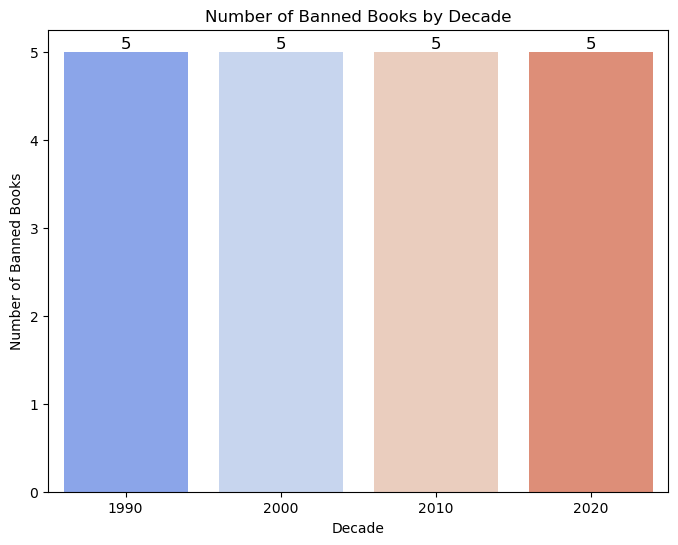

In [120]:

# Count the number of books banned in each decade
decade_counts = df['Decade'].value_counts()

# Plotting a bar chart with numbers on the bars
Banned_decade = plt.figure(figsize=(8, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="coolwarm")

# Add the numbers on top of each bar
for i, value in enumerate(decade_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.title("Number of Banned Books by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Banned Books")
plt.show()


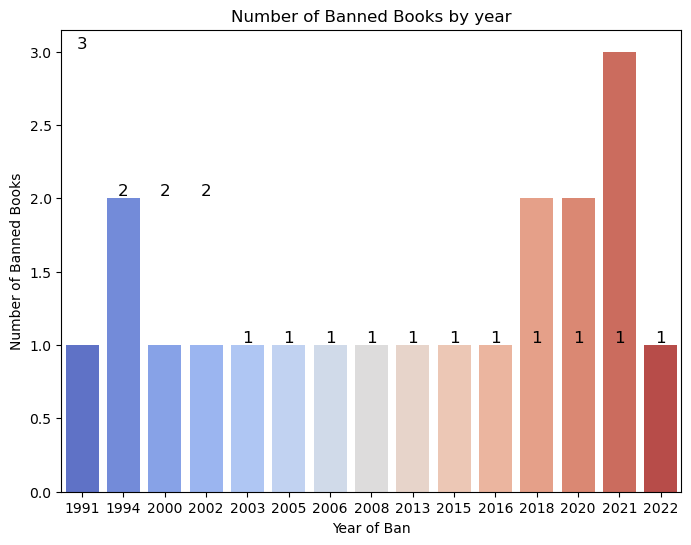

In [122]:

# Count the number of books banned in each decade
decade_counts = df['Year of Ban'].value_counts()

# Plotting a bar chart with numbers on the bars
banned_over_time = plt.figure(figsize=(8, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="coolwarm")

# Add the numbers on top of each bar
for i, value in enumerate(decade_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.title("Number of Banned Books by year")
plt.xlabel("Year of Ban")
plt.ylabel("Number of Banned Books")
plt.show()


In [125]:

# Normalize the text case by converting to lowercase
df['Themes'] = df['Themes'].str.lower()
df['Reason for Ban'] = df['Reason for Ban'].str.lower()

# Split the 'Themes' and 'Reason for Ban' columns into lists
df['Themes'] = df['Themes'].str.split(', ')
df['Reason for Ban'] = df['Reason for Ban'].str.split(', ')

# Explode both columns to create a new row for each theme-reason pair
df_expanded = df.explode('Themes').explode('Reason for Ban')

# Now df_expanded contains one theme-reason pair per row
print(df_expanded.head())


   Decade            Title             Author  Year of Publication  \
0    1990  American Psycho  Bret Easton Ellis                 1991   
0    1990  American Psycho  Bret Easton Ellis                 1991   
0    1990  American Psycho  Bret Easton Ellis                 1991   
0    1990  American Psycho  Bret Easton Ellis                 1991   
0    1990  American Psycho  Bret Easton Ellis                 1991   

   Year of Ban Country/Region of Ban  Reason for Ban  \
0         1991    Australia, Germany        violence   
0         1991    Australia, Germany  sexual content   
0         1991    Australia, Germany        violence   
0         1991    Australia, Germany  sexual content   
0         1991    Australia, Germany        violence   

                                        Plot Summary       Themes  \
0  A disturbing narrative following the life of P...     violence   
0  A disturbing narrative following the life of P...     violence   
0  A disturbing narrative following

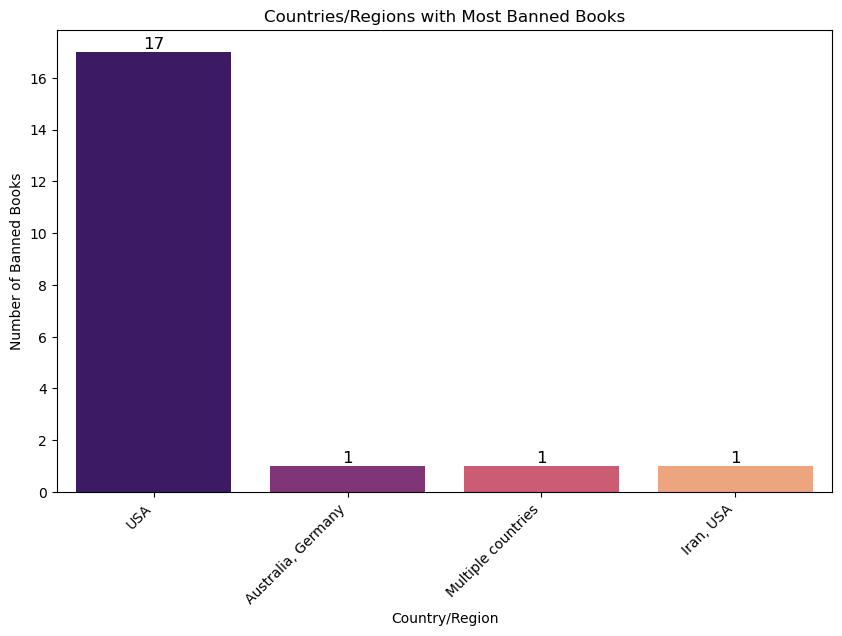

In [123]:
# Unpacking and counting the countries where books were banned
countries = df['Country/Region of Ban'].explode()
country_counts = countries.value_counts()

# Plotting a bar chart for the countries with the most bans, including numbers on the bars
most_banned=plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="magma")

# Add the numbers on top of each bar
for i, value in enumerate(country_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45, ha='right')
plt.title("Countries/Regions with Most Banned Books")
plt.xlabel("Country/Region")
plt.ylabel("Number of Banned Books")
plt.show()


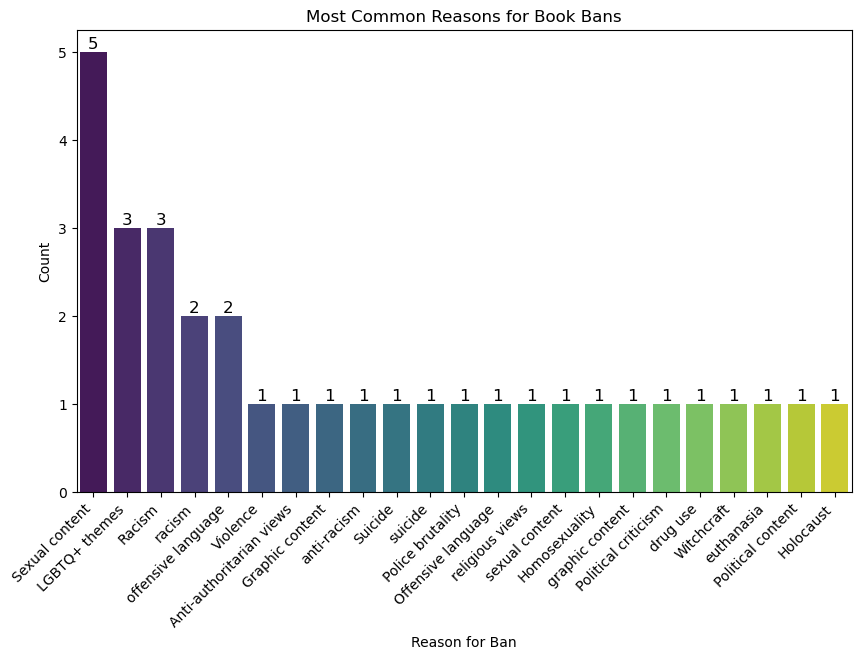

In [124]:
# Splitting and flattening the reasons
all_reasons = df['Reason for Ban'].str.split(', ').sum()
reason_counts = Counter(all_reasons)

# Converting the counts into a DataFrame for easier plotting
reason_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count']).sort_values(by='Count', ascending=False)

# Plotting a bar chart of the most common reasons with numbers on the bars
common_reasons = plt.figure(figsize=(10, 6))
sns.barplot(x=reason_df['Reason'], y=reason_df['Count'], palette="viridis")

# Add the numbers on top of each bar
for i, value in enumerate(reason_df['Count']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45, ha='right')
plt.title("Most Common Reasons for Book Bans")
plt.xlabel("Reason for Ban")
plt.ylabel("Count")
plt.show()

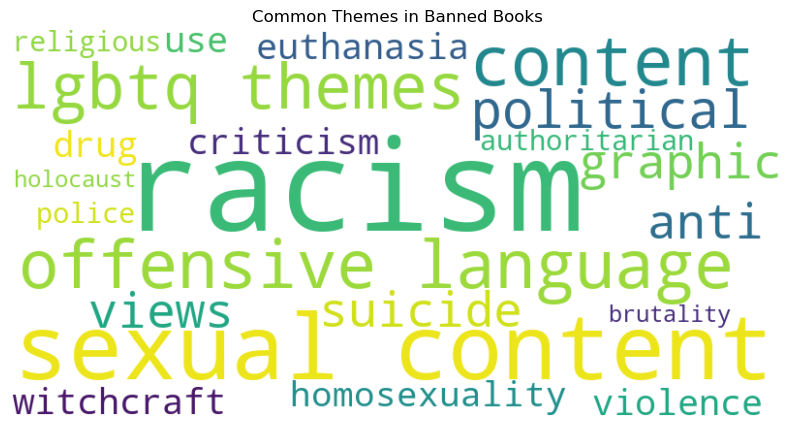

In [126]:
# Word CLoud for tehme analysis

# Assuming you have a column for "Themes"
themes = df_expanded['Reason for Ban'].str.cat(sep=', ')  # Combine all themes into a single string

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(themes)

# Display the word cloud
theme_wordcloud = plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Common Themes in Banned Books')
plt.show()


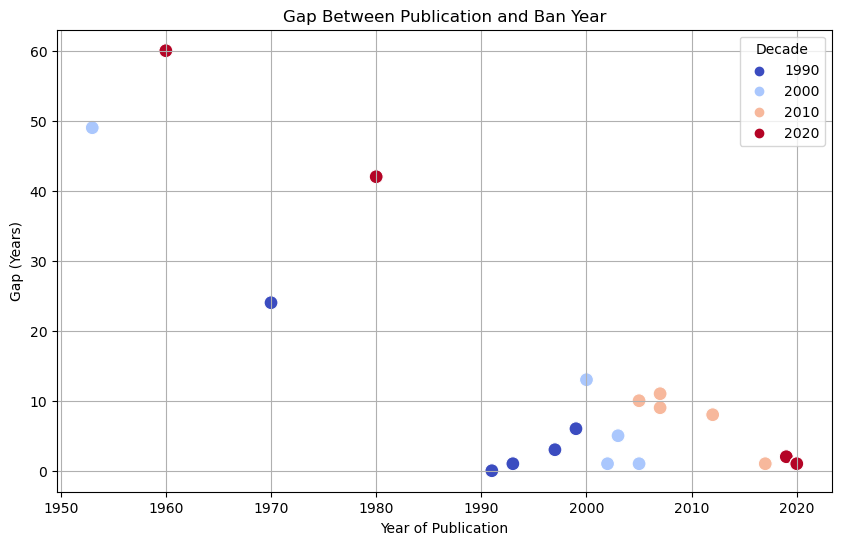

In [127]:

# Create a new column for the gap between publication and ban year
df['Gap (Years)'] = df['Year of Ban'] - df['Year of Publication']

# Plotting the scatter plot
Publish_Ban_Gap= plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year of Publication', y='Gap (Years)', data=df, hue='Decade', palette='coolwarm', s=100)

# Customize the plot
plt.title("Gap Between Publication and Ban Year")
plt.xlabel("Year of Publication")
plt.ylabel("Gap (Years)")
plt.grid(True)
plt.show()

# Sentiment Analysis: If text data (like summaries) are available, use sentiment analysis to gauge the general tone (positive, negative, neutral) of banned books and visualize the sentiment distribution.

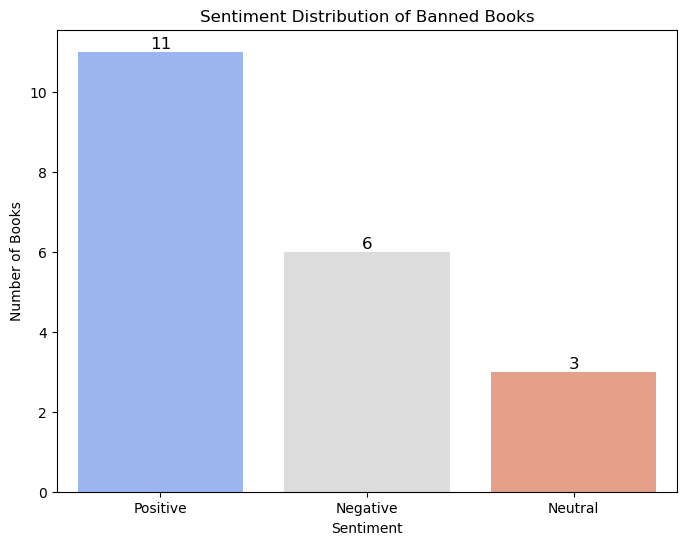

In [135]:


# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming we have a 'Plot Summary' column with the book summaries
# Apply sentiment analysis to each plot summary
df['Sentiment Score'] = df['Plot Summary'].apply(lambda summary: analyzer.polarity_scores(summary)['compound'])

# Classify the sentiment as Positive, Negative, or Neutral based on the score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment Score'].apply(classify_sentiment)

# Plot the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count of positive, negative, and neutral books
sentiment_counts = df['Sentiment'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")

# Add the numbers on top of each bar
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.title("Sentiment Distribution of Banned Books")
plt.xlabel("Sentiment")
plt.ylabel("Number of Books")
plt.show()


# Theme Correations

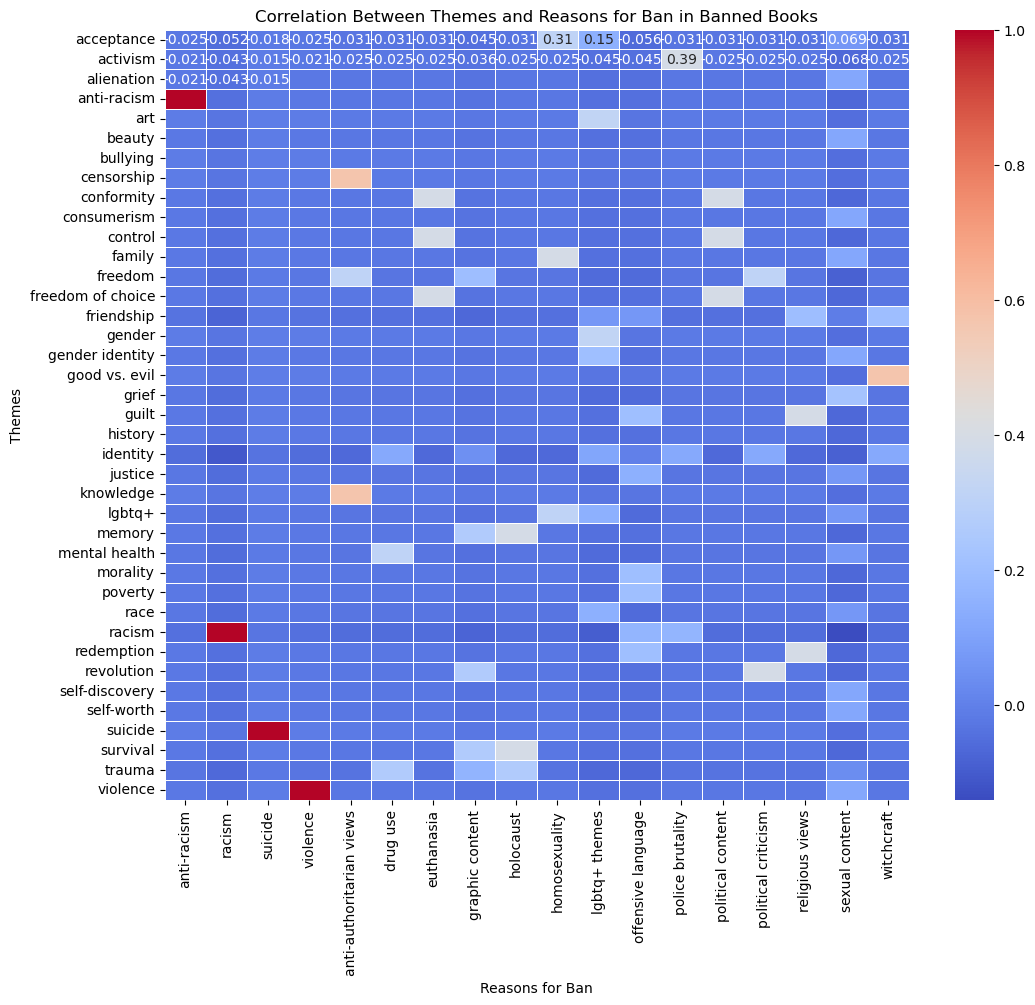

In [138]:

# Assuming df_expanded is your DataFrame with 'Themes' and 'Reason for Ban'

# Step 1: Normalize text case to avoid case-sensitive duplicates
df_expanded['Themes'] = df_expanded['Themes'].str.lower()
df_expanded['Reason for Ban'] = df_expanded['Reason for Ban'].str.lower()

# Step 2: Convert the 'Reason for Ban' into individual binary columns using one-hot encoding
reason_dummies = df_expanded['Reason for Ban'].str.get_dummies(sep=', ')

# Step 3: Convert the 'Themes' into individual binary columns using one-hot encoding
theme_dummies = df_expanded['Themes'].str.get_dummies(sep=', ')

# Combine both one-hot encoded DataFrames (Themes and Reasons) ensuring no duplicate columns
combined_dummies = pd.concat([theme_dummies, reason_dummies], axis=1)

# Ensure there are no duplicate column names (this might occur if two columns had the same name due to multi-value)
combined_dummies = combined_dummies.loc[:, ~combined_dummies.columns.duplicated()]

# Step 4: Compute the correlation matrix between themes and reasons for ban
correlation_matrix = combined_dummies.corr()

# Step 5: Extract the correlation between Themes and Reasons for Ban (only cross-relations)
themes_columns = [col for col in correlation_matrix.columns if col in theme_dummies.columns]
reasons_columns = [col for col in correlation_matrix.columns if col in reason_dummies.columns]
theme_reason_corr = correlation_matrix.loc[themes_columns, reasons_columns]

# Step 6: Plot the heatmap
theme_correlation = plt.figure(figsize=(12, 10))
sns.heatmap(theme_reason_corr, annot=True, cmap="coolwarm", linewidths=.5)

# Add title and labels
plt.title("Correlation Between Themes and Reasons for Ban in Banned Books")
plt.xlabel("Reasons for Ban")
plt.ylabel("Themes")
plt.show()


# Interactive Timeline showing when books were published and when they were banned.

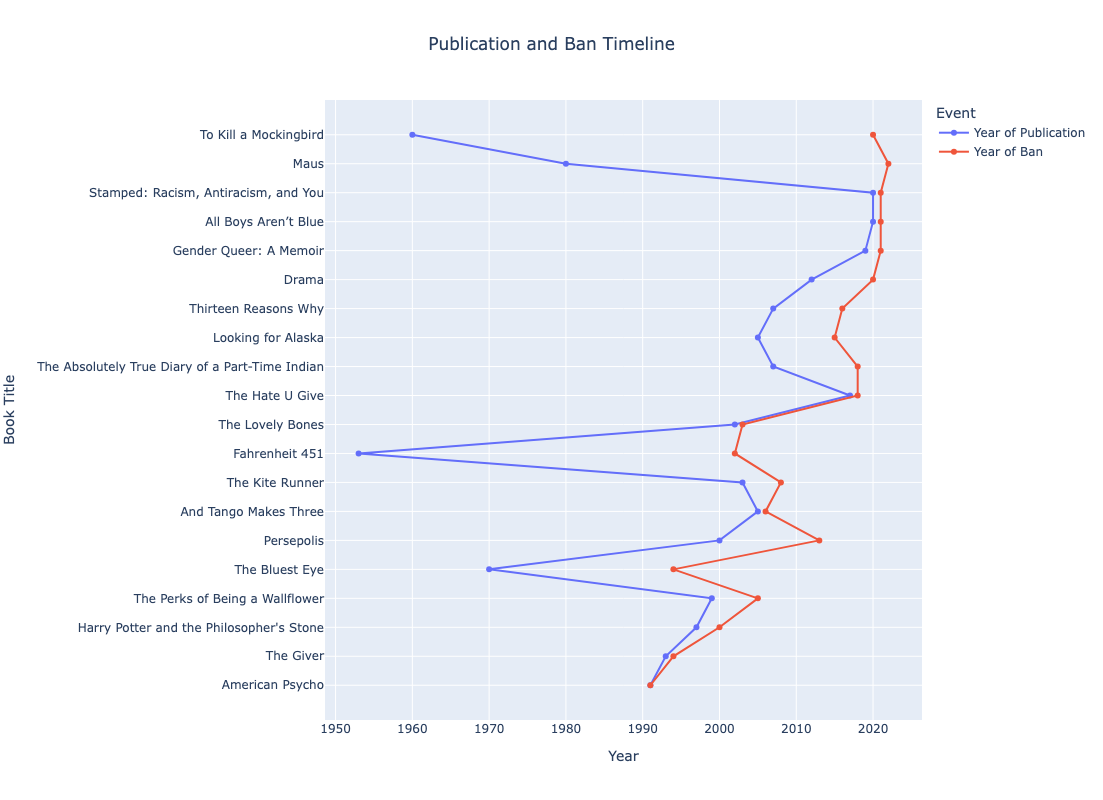

In [131]:

df_melt = df.melt(id_vars=['Title'], value_vars=['Year of Publication', 'Year of Ban'], 
                  var_name='Event', value_name='Year')

# Create the timeline plot
fig = px.line(df_melt, x='Year', y='Title', color='Event', 
              markers=True, title='Publication and Ban Timeline')

# Customize and display
fig.update_layout(yaxis_title='Book Title', xaxis_title='Year', title_x=0.5, height = 800)
fig.show()

# Sankey Diagram:  show the flow between "Themes" and "Reasons for Ban" across decades, helping visualize connections between content and censorship.

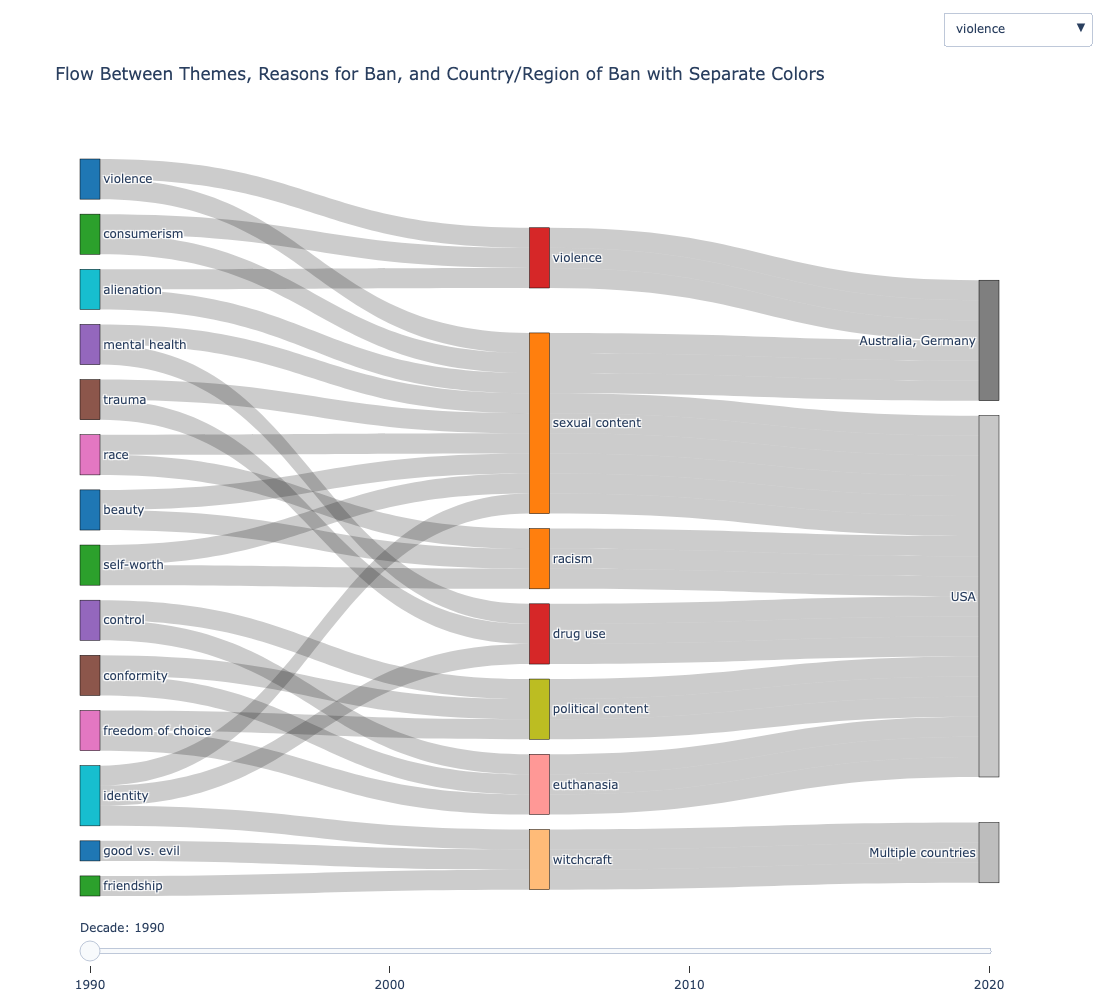

In [107]:

# Extract unique labels for Themes, Reasons for Ban, and Country/Region of Ban
themes = df_expanded['Themes'].unique()  # Unique themes
reasons = df_expanded['Reason for Ban'].unique()  # Unique reasons
countries = df_expanded['Country/Region of Ban'].unique()  # Unique countries/regions

# Combine all labels for the nodes in Sankey
all_labels = list(themes) + list(reasons) + list(countries)

# Create index mappings for source-target relationships
theme_to_index = {theme: i for i, theme in enumerate(themes)}
reason_to_index = {reason: i + len(themes) for i, reason in enumerate(reasons)}
country_to_index = {country: i + len(themes) + len(reasons) for i, country in enumerate(countries)}

# Define color schemes for Themes, Reasons, and Countries
theme_colors = ['#1f77b4', '#2ca02c', '#17becf', '#9467bd', '#8c564b', '#e377c2'] * (len(themes) // 6 + 1)
reason_colors = ['#d62728', '#ff7f0e', '#bcbd22', '#ff9896', '#ffbb78'] * (len(reasons) // 5 + 1)
country_colors = ['#7f7f7f', '#c7c7c7', '#bdbdbd', '#b0b0b0', '#9e9e9e', '#a5a5a5'] * (len(countries) // 6 + 1)

# Combine the colors for nodes: Themes, Reasons, and Countries
node_colors = theme_colors[:len(themes)] + reason_colors[:len(reasons)] + country_colors[:len(countries)]

# Initialize lists for each decade (source, target, value for each decade)
source_by_decade = {}
target_by_decade = {}
value_by_decade = {}

# Populate source, target, and value for each decade
for decade in sorted(df_expanded['Decade'].unique()):
    source_by_decade[decade] = []
    target_by_decade[decade] = []
    value_by_decade[decade] = []
    
    for idx, row in df_expanded[df_expanded['Decade'] == decade].iterrows():
        theme = row['Themes']
        reason = row['Reason for Ban']
        country = row['Country/Region of Ban']
        
        # Append source, target, and value for theme-reason and reason-country pairs
        source_by_decade[decade].append(theme_to_index[theme])  # Theme index
        target_by_decade[decade].append(reason_to_index[reason])  # Reason index
        value_by_decade[decade].append(1)
        
        # Adding flow between Reason and Country/Region of Ban
        source_by_decade[decade].append(reason_to_index[reason])  # Reason index as source
        target_by_decade[decade].append(country_to_index[country])  # Country index as target
        value_by_decade[decade].append(1)

# Create the Sankey diagram and assign it to a variable
sankey_fig = go.Figure()

for decade in sorted(df_expanded['Decade'].unique()):
    sankey_fig.add_trace(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels,
            color=node_colors  # Apply the color scheme
        ),
        link=dict(
            source=source_by_decade[decade],  # Source nodes for the decade
            target=target_by_decade[decade],  # Target nodes for the decade
            value=value_by_decade[decade],    # Values for the flows
        ),
        visible=False  # Initially, all traces are hidden
    ))

# Make the first decade visible initially
sankey_fig.data[0].visible = True

# Define slider steps for each decade
slider_steps = [
    {'method': 'update', 'label': str(decade), 
     'args': [{'visible': [decade == d for d in sorted(df_expanded['Decade'].unique())]}]} 
    for decade in sorted(df_expanded['Decade'].unique())
]

# Add a slider to filter by Decade
sliders = [{
    'steps': slider_steps,
    'active': 0,
    'currentvalue': {'prefix': 'Decade: '}
}]
# Create a dropdown for Themes
theme_buttons = []
for theme in themes:
    # Make all decades for this theme visible
    visible_array = [False] * len(fig.data)
    
    for i, decade in enumerate(sorted(df_expanded['Decade'].unique())):
        visible_array[i] = True  # Make this theme's data for the current decade visible

    theme_buttons.append(dict(
        method='update',
        label=theme,
        args=[{'visible': visible_array}]  # Update the visibility array based on the theme
    ))
    
# Update layout to include the slider and dropdown
sankey_fig.update_layout(
    title_text="Flow Between Themes, Reasons for Ban, and Country/Region of Ban with Separate Colors",
    font_size=12,
    width=800,
    height=1000,
    sliders=sliders,  # Add the slider
     updatemenus=[{
        'buttons': theme_buttons,
        'direction': "down",
        'showactive': True,
        'x': 1.1,
        'y': 1.2,
        'xanchor': 'right',
        'yanchor': 'top'
    }]
)

# Display the figure with the assigned variable
sankey_fig.show()
